# Hierarchical clustering lab

For this exercise we are using the USArrest data which is one of the datasets provided by R, more information can be found on https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html.
It contains data on the rate of arrests for murder, assault and rape per 100000 inhabitants and the percentage of urban population per US state.

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distahttps://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.htmlnce import pdist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from matplotlib import cm
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
# plt.rcParams['lines.linewidth'] = 1
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### 1. Load the dataset from the provided file

In [3]:
df = pd.read_csv('USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


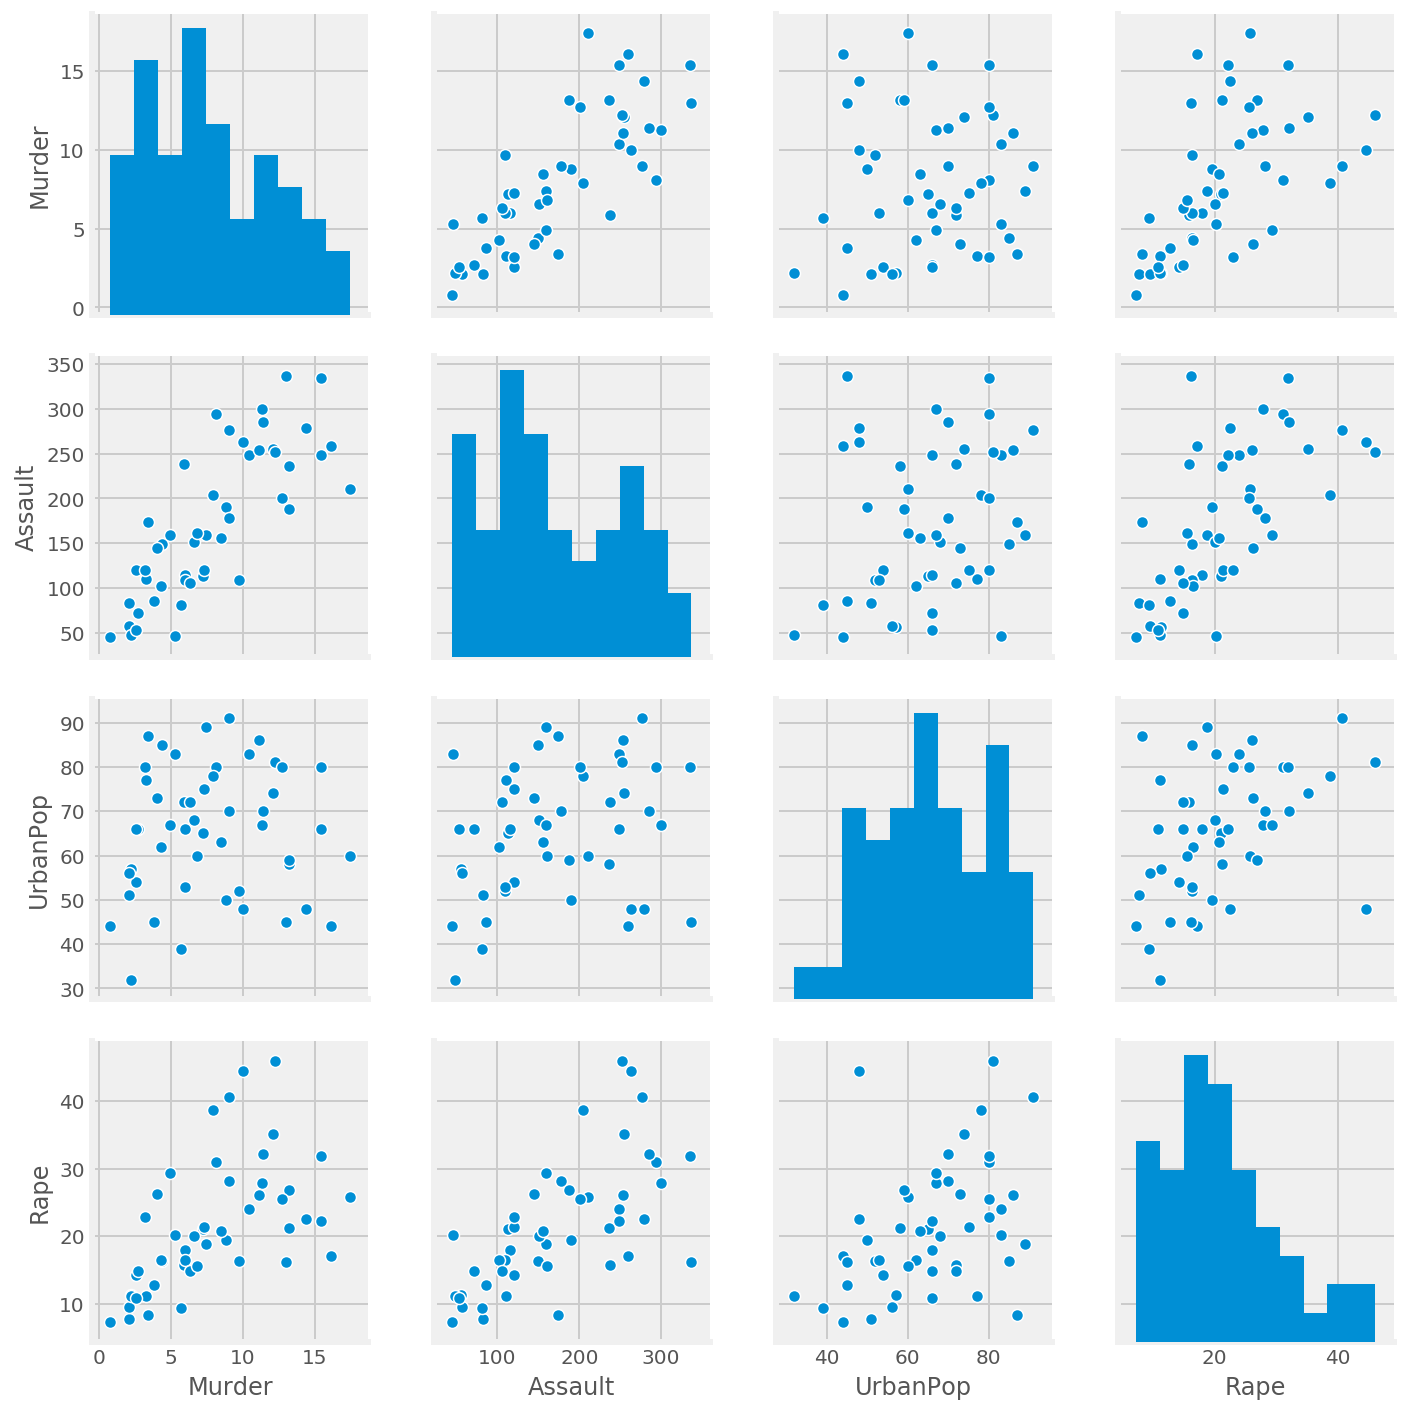

In [5]:
sns.pairplot(df)
plt.show()

#### 2. Use the standard scaler to rescale the data

In [6]:
# scaler = ...
df2 = df.drop(['States'], axis=1)
ss = StandardScaler()
X2 = ss.fit(df2)

#### 3. Perform hierarchical clustering on the rescaled dataset from 2., calculate the cophenetic correlation and distances and plot the resulting dendrogram

In [9]:
X = df2.as_matrix(columns=None)
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


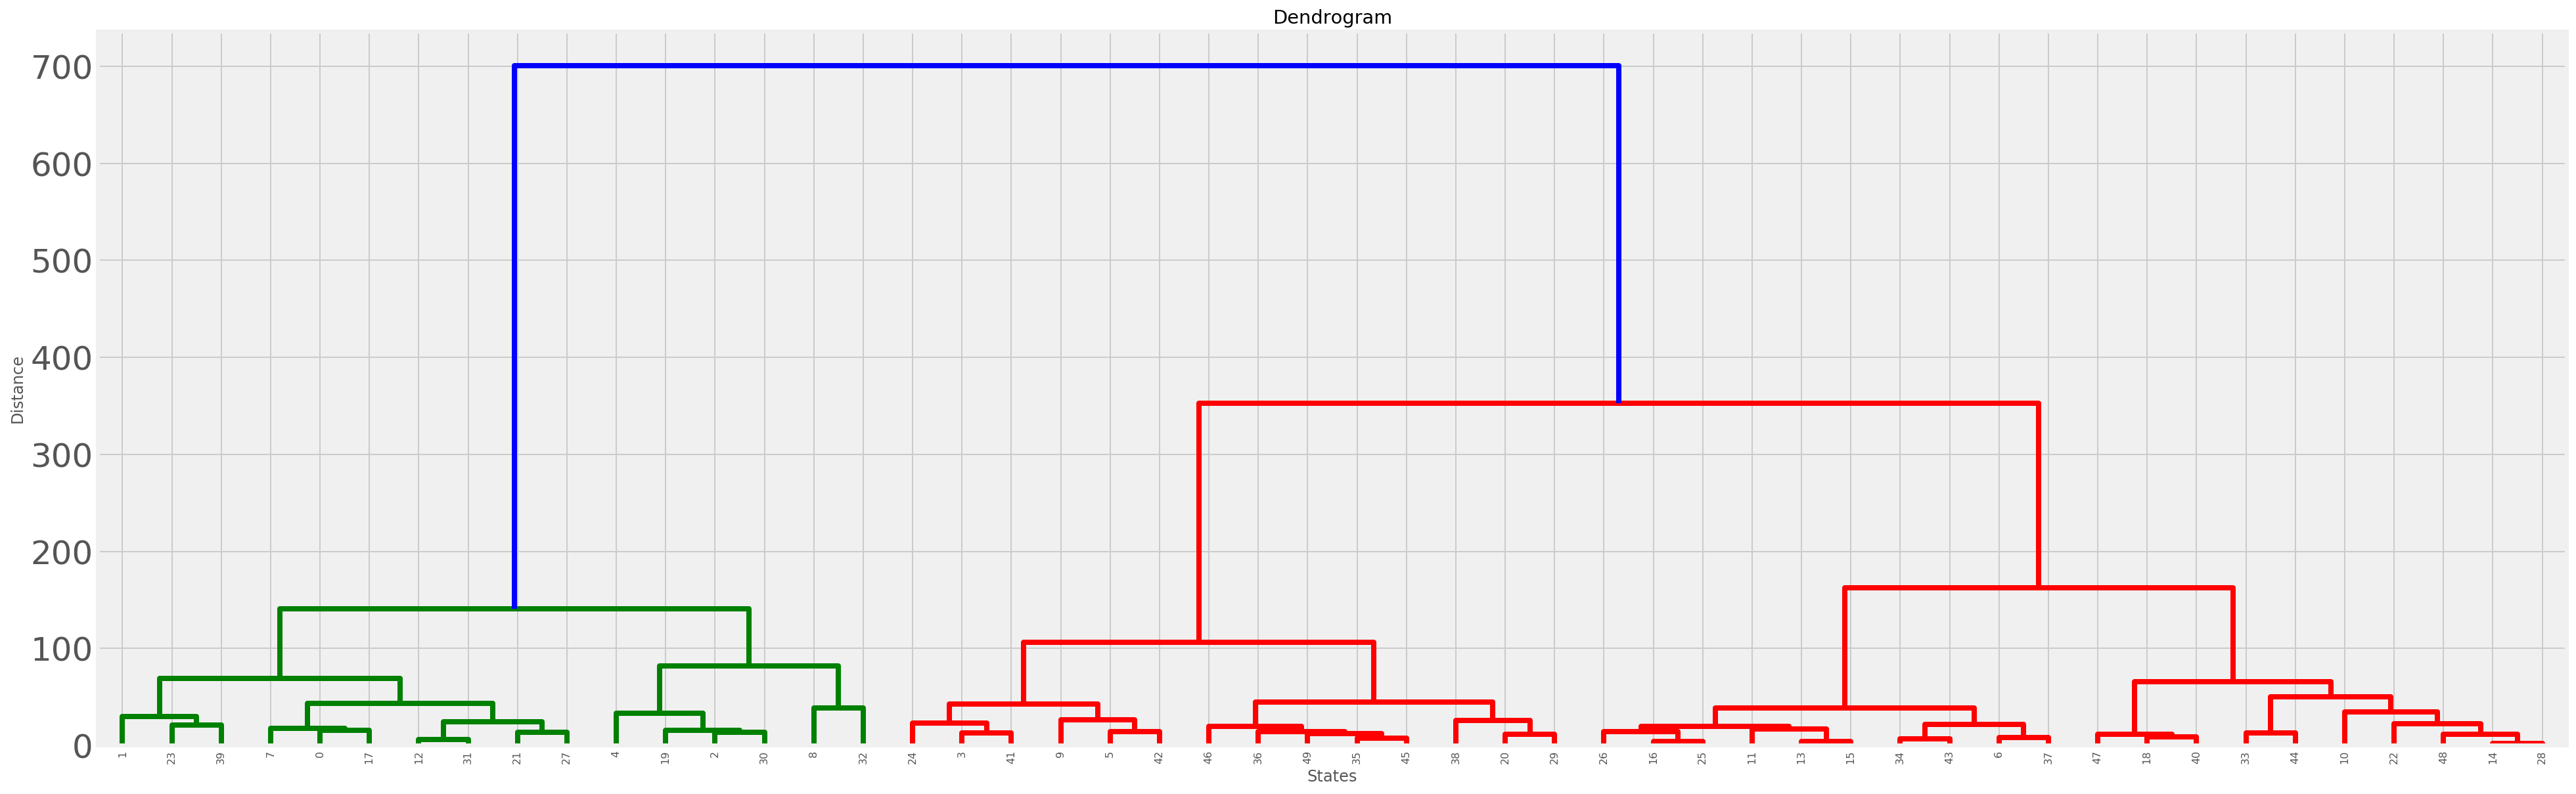

In [13]:
plt.figure(figsize=(30, 10))
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
plt.yticks(fontsize=25.)
plt.show()

#### 4. plot the result of the above clusterisation using K=4

In [14]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
labels = model.predict(df2)

In [16]:
predicted = model.labels_

#### 5. Now take the clustering from 4 and obtain cluster labels for the data points using the fcluster function. Vary the threshold. Produce a plot which shows the number of different clusters obtained versus the threshold value. 

In [17]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
max_dist = 150 # pairwise distance
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 4, 3, 1, 3, 4, 3, 3, 1, 4, 1, 2, 1,
       4, 1, 2, 3, 3, 1, 4, 2, 1, 1, 1, 4, 3, 2, 2, 3, 2, 1, 4, 2, 2, 3,
       4, 2, 2, 4, 4, 2], dtype=int32)

#### 6.Using the inconsistancy metric along with the Elbow method, identify what could be a good number of cluster

In [18]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 19.3236794 ,  12.72456877,   7.        ,   2.00279578],
       [ 22.3691721 ,  17.4882539 ,   6.        ,   1.5991275 ],
       [ 27.26379002,  21.19320656,   8.        ,   1.82766308],
       [ 26.73005261,  19.22453051,   9.        ,   2.21694093],
       [ 36.81938182,  27.58412411,   5.        ,   1.64859536],
       [ 29.41660903,  26.68868176,  12.        ,   2.88045911],
       [ 37.72007494,  35.64273538,  15.        ,   2.90139535],
       [ 29.55021277,  38.35725464,  17.        ,   3.47130505],
       [ 44.83830666,  71.58388213,  26.        ,   4.3018809 ],
       [ 82.55717136, 141.87525622,  27.        ,   4.35820486]])

#### 7. Continue with the results from 5 and 6. Set your threshold so that 4 different clusters are obtained. Produce a scatter plot of the data with the points coloured according to their cluster label.

In [19]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(df2)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print("Clusters represented at distance: ", set(clusters))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 8))

    ax[0].scatter(X[:,0], X[:,1], c=clusters, cmap=cm.jet, s=40)

    ax[0].set_title("Max Dist: %d" % max_dist)
    
    # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
#     ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax[1].plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax[1].set_title('Dendrogram')
    ax[1].set_xlabel('Index Numbers')
    ax[1].set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.
#         link_color_func=lambda color: cm['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

In [20]:
interact(plot_wrapper, max_dist=IntSlider(min=100, max=200, step=1));

interactive(children=(IntSlider(value=100, description='max_dist', max=200, min=100), Output()), _dom_classes=…

#### Optional 1: Annotate the points in the scatter plot by the state names and identify the states belonging to the same cluster.